# ML Project - Bank Marketing Prediction

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df = pd.read_csv("bank-marketing.csv")

In [15]:
df

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Dataset has rows 45211 and columns 19

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


Therefore we can say that dataset doesnot contain any null value

In [17]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### 1.Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [18]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

#### If we purely look at numerical summary ie mean and standard deviation, we can't see that lot of values is -1. We can see that 75% values of pdays are -1. So -1 has special meaning over here ie previous campaign was made to them or not. So in our case if we want to make decision on customer who did have campaign previously, then we must exclude all the cases of -1. So, by doing this we can get to customer who had previously campaign.

### 2.0 Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [19]:
df1=df.copy()
df1.drop(df1[df1['pdays'] < 0].index, inplace = True) 

In [20]:
df1

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,20000,single,secondary,yes,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,100000,married,tertiary,yes,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,55000,married,secondary,yes,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [21]:
df1.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

#### This time mean and median has changed significantly because we have removed the case where pdays value is -1 ie we have removed the customer that were not contacted previously for campaign.

### 3.Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

<AxesSubplot:ylabel='education'>

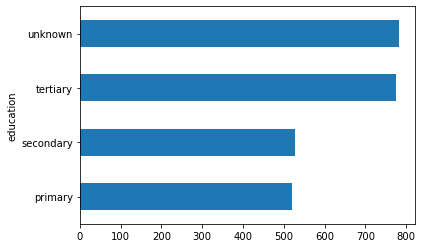

In [22]:
df1.groupby(['education'])['balance'].median().plot.barh()

#### Thus, we can conclude from graph that customer with tertiary level of education has highest median value for balance.

### 4.Make a box plot for pdays. Do you see any outliers

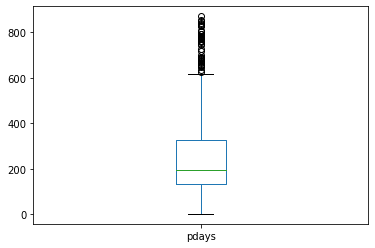

In [23]:
df1.pdays.plot.box()
plt.show()

#### Yes, from the above box plot we can see that there are outliers present in pdays.

### The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”.First, perform bi-variate analysis to identify the features that are directly associated with the target variable. You can refer to the notebook we used for the EDA discussion.


In [24]:
df1.response.value_counts(normalize=True)

no     0.769287
yes    0.230713
Name: response, dtype: float64

### Converting the response variable to a convenient form.

In [25]:
df1.replace({'response': {"yes": 1,'no':0}},inplace=True)

In [26]:
df1

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,20000,single,secondary,yes,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,0
45201,53,management,100000,married,tertiary,yes,no,583,no,no,cellular,17,nov,226,1,184,4,success,1
45204,73,retired,55000,married,secondary,yes,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,1
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1


In [27]:
df1.response.value_counts()

0    6352
1    1905
Name: response, dtype: int64

### Make suitable plots for associations with numerical features and categorical features

In [28]:
cols = df1.columns.to_list()
num_cols= df1._get_numeric_data().columns.to_list()
cat_cols = list(set(cols) - set(num_cols))

print('Numerical Columns')
print(num_cols)
print('\nCategorical Columns')
print(cat_cols)

Numerical Columns
['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']

Categorical Columns
['education', 'loan', 'job', 'poutcome', 'default', 'contact', 'marital', 'housing', 'month', 'targeted']


### Visualizing Numerical Features with Response


C:\Users\295pr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


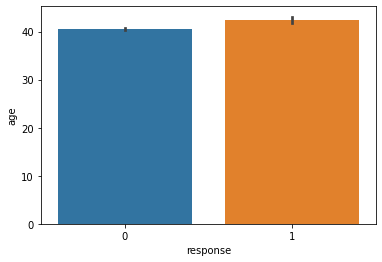

C:\Users\295pr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


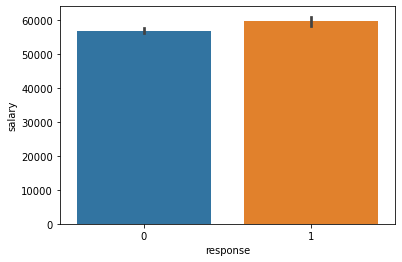

C:\Users\295pr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


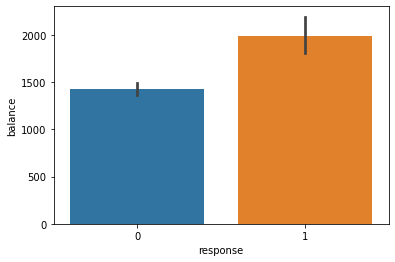

C:\Users\295pr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


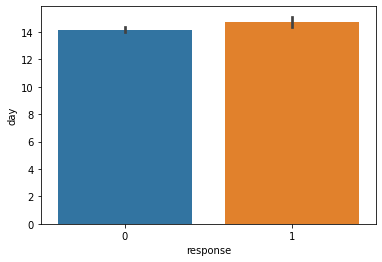

C:\Users\295pr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


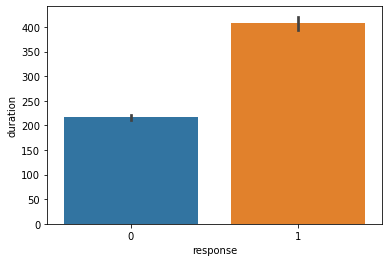

C:\Users\295pr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


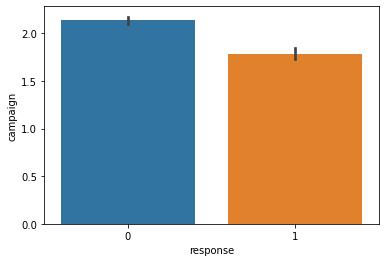

C:\Users\295pr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


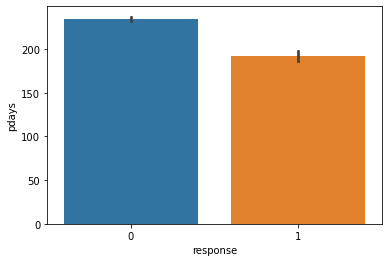

C:\Users\295pr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


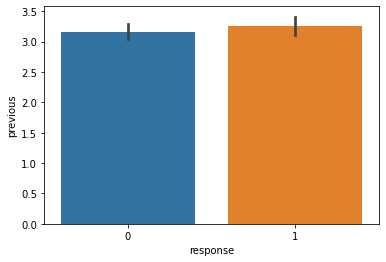

C:\Users\295pr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


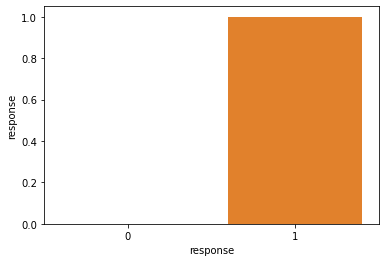

In [29]:
for i in df1[num_cols]:
    sns.barplot(df1['response'],df1[i])
    plt.show()

Visualizing Categorical Features with Response

C:\Users\295pr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


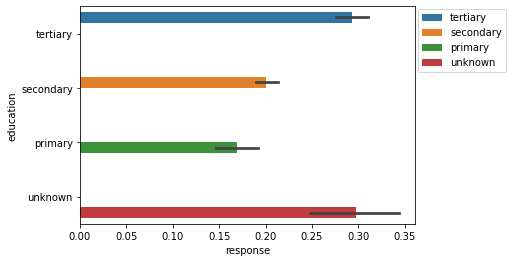

C:\Users\295pr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


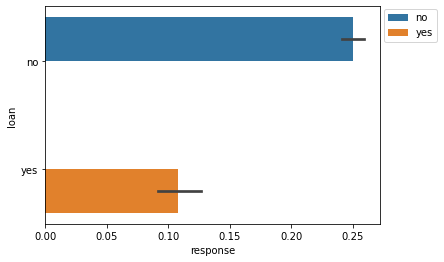

C:\Users\295pr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


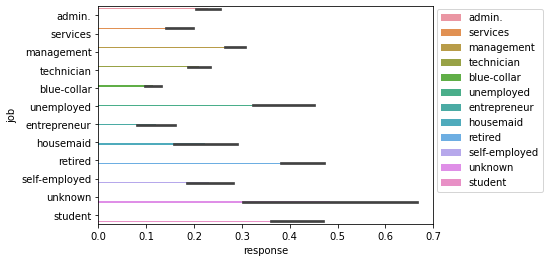

C:\Users\295pr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


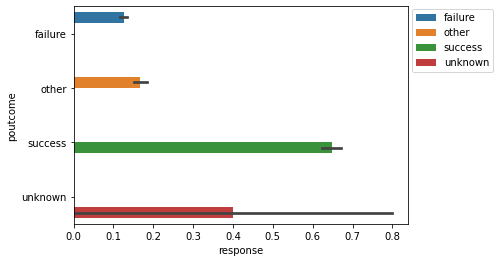

C:\Users\295pr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


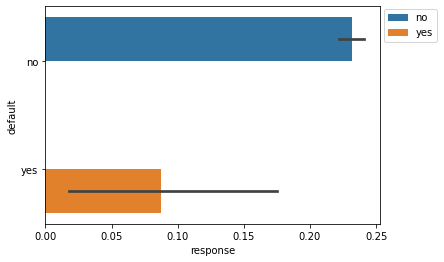

C:\Users\295pr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


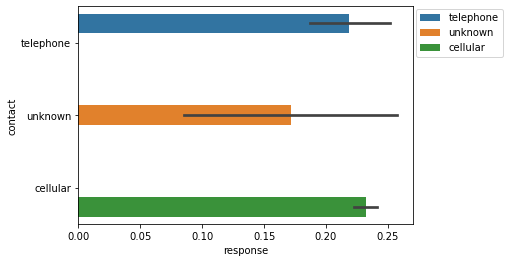

C:\Users\295pr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


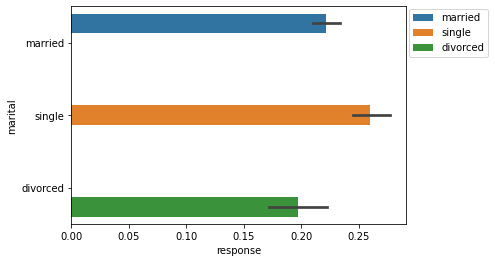

C:\Users\295pr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


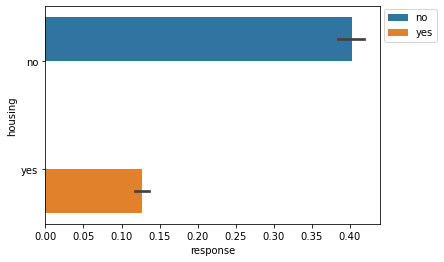

C:\Users\295pr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


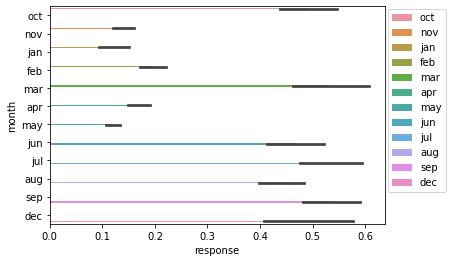

C:\Users\295pr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


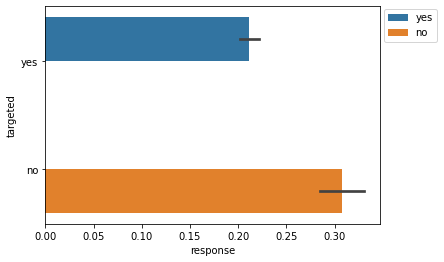

In [30]:
for i in df1[cat_cols]:
    sns.barplot(df1['response'],df1[i],hue=df1[i])
    plt.legend(bbox_to_anchor=(1.01,.99),borderaxespad=0,loc=2)
    plt.show()

### Are the features about the previous campaign data useful?Are pdays and poutcome associated with the target? If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.

#### Yes previous campaign data is useful & pdays, poutcome is associated with the target variable 'response'

#### The -1 pdays or missing values or outliers are filtered out as we would not be using that in Modelling.

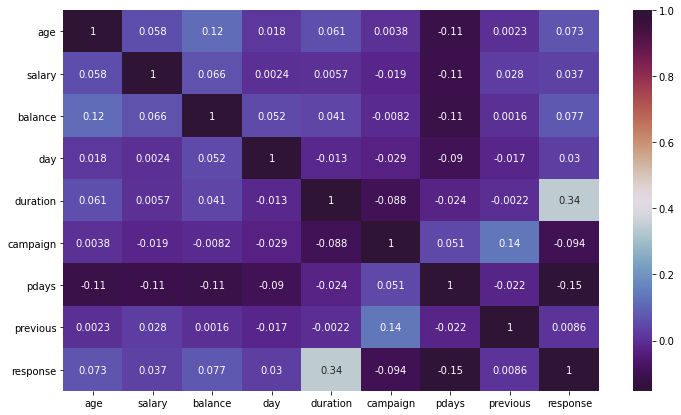

In [31]:
plt.figure(figsize=(12,7))
corr = df1.corr()
sns.heatmap(corr,annot=True,cmap= 'twilight_shifted')
plt.show()

### Before the predictive modeling part, make sure to perform 
### The necessary transformations for the categorical variables and the numeric variables
### Handle variables corresponding to the previous campaign
### Train test split

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
df2 = df1[cat_cols].apply(LabelEncoder().fit_transform)
df2.head()

,education,loan,job,poutcome,default,contact,marital,housing,month,targeted
24060,2,0,0,0,0,1,1,0,10,1
24062,1,1,0,1,0,1,2,1,10,1
24064,1,0,7,0,0,1,1,1,10,1
24072,2,0,4,1,0,1,1,1,10,1
24077,2,0,4,0,0,1,1,1,10,1


In [34]:
df3 = df2.join(df1[num_cols])
df3.head()

,education,loan,job,poutcome,default,contact,marital,housing,month,targeted,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,2,0,0,0,0,1,1,0,10,1,33,50000,882,21,39,1,151,3,0
24062,1,1,0,1,0,1,2,1,10,1,42,50000,-247,21,519,1,166,1,1
24064,1,0,7,0,0,1,1,1,10,1,33,70000,3444,21,144,1,91,4,1
24072,2,0,4,1,0,1,1,1,10,1,36,100000,2415,22,73,1,86,4,0
24077,2,0,4,0,0,1,1,1,10,1,36,100000,0,23,140,1,143,3,1


In [35]:
df3.corr()

,education,loan,job,poutcome,default,contact,marital,housing,month,targeted,age,salary,balance,day,duration,campaign,pdays,previous,response
education,1.000000,-0.047718,0.159280,0.082852,-0.013682,-0.048456,0.121688,-0.129804,-0.010829,-0.632513,-0.119516,0.423157,0.074166,0.023542,-0.001142,-0.024343,-0.140155,0.000115,0.108098
loan,-0.047718,1.000000,-0.033500,-0.103154,0.052261,-0.020904,-0.055435,0.109815,0.000524,0.070420,-0.008330,0.013788,-0.085004,0.007550,-0.033874,0.007444,0.022454,0.016549,-0.115805
job,0.159280,-0.033500,1.000000,0.066642,-0.021012,-0.006279,0.072746,-0.132378,-0.002498,-0.091197,-0.020606,0.115271,0.041975,0.013841,0.024449,-0.008764,-0.110505,-0.000266,0.081239
poutcome,0.082852,-0.103154,0.066642,1.000000,-0.025566,0.024590,0.045015,-0.284439,-0.019188,-0.071356,0.051987,0.013079,0.051464,0.017125,0.108473,-0.000502,-0.235119,0.041607,0.420519
default,-0.013682,0.052261,-0.021012,-0.025566,1.000000,-0.019834,-0.005632,0.022644,0.020123,0.019593,-0.027825,0.000361,-0.045010,-0.001013,-0.002635,-0.002064,0.033760,0.012149,-0.028299
contact,-0.048456,-0.020904,-0.006279,0.024590,-0.019834,1.000000,-0.031866,-0.069869,0.047045,0.020464,0.166384,-0.035805,0.030317,-0.012330,-0.036360,0.063199,0.077235,0.043830,-0.014321
marital,0.121688,-0.055435,0.072746,0.045015,-0.005632,-0.031866,1.000000,-0.056963,-0.024130,-0.255247,-0.414972,-0.042212,-0.019767,0.016797,-0.009075,-0.008338,-0.011861,0.004536,0.049234
housing,-0.129804,0.109815,-0.132378,-0.284439,0.022644,-0.069869,-0.056963,1.000000,0.014452,0.087470,-0.179386,-0.035905,-0.109163,-0.066740,-0.072070,0.063071,0.335124,0.008934,-0.317501
month,-0.010829,0.000524,-0.002498,-0.019188,0.020123,0.047045,-0.024130,0.014452,1.000000,0.010187,0.013909,0.019820,0.015723,-0.024264,-0.036446,0.023224,0.022529,0.013977,-0.009586
targeted,-0.632513,0.070420,-0.091197,-0.071356,0.019593,0.020464,-0.255247,0.087470,0.010187,1.000000,0.140750,-0.228338,-0.052007,-0.026179,-0.014729,0.017948,0.075638,-0.001205,-0.091216


## Logistic Regression Model

In [36]:
# Make a predictive model using logistic regression
# - Use RFE to select top n features in an automated fashion (choose n as you see fit)
# - Using p values and VIF, get rid of the redundant features
# - Estimate the model performance using k fold cross validation
# - What is the precision, recall, accuracy of your model?
# - Which features are the most important from your model?

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.random.seed(42)

In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
X = df3.drop("response", axis=1)
X.head()

,education,loan,job,poutcome,default,contact,marital,housing,month,targeted,age,salary,balance,day,duration,campaign,pdays,previous
24060,2,0,0,0,0,1,1,0,10,1,33,50000,882,21,39,1,151,3
24062,1,1,0,1,0,1,2,1,10,1,42,50000,-247,21,519,1,166,1
24064,1,0,7,0,0,1,1,1,10,1,33,70000,3444,21,144,1,91,4
24072,2,0,4,1,0,1,1,1,10,1,36,100000,2415,22,73,1,86,4
24077,2,0,4,0,0,1,1,1,10,1,36,100000,0,23,140,1,143,3


In [40]:
y = df3[['response']]
y.head()

,response
24060,0
24062,1
24064,1
24072,0
24077,1


In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [42]:
lr = LogisticRegression()

In [43]:
lr.fit(X_train,y_train)

LogisticRegression()

In [44]:
cv_score= cross_val_score(lr,X_train,y_train, cv=5)
np.mean(cv_score)

0.7772899318697957

In [45]:
y_pred_lr = lr.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1279
           1       0.58      0.20      0.30       373

    accuracy                           0.79      1652
   macro avg       0.69      0.58      0.59      1652
weighted avg       0.75      0.79      0.74      1652



In [47]:
confusion_matrix(y_pred_lr,y_test)

array([[1224,  297],
       [  55,   76]], dtype=int64)

In [48]:
f1_score(y_pred_lr,y_test)

0.30158730158730157

In [49]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe = RFE(lr, 5)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [50]:
rfe.support_

array([False,  True, False,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False])

In [51]:
X_train.columns[rfe.support_]

Index(['loan', 'poutcome', 'default', 'contact', 'housing'], dtype='object')

In [52]:
cols = X_train.columns[rfe.support_]

In [53]:
lr.fit(X_train[cols],y_train)

LogisticRegression()

In [54]:
y_pred2_lr = lr.predict(X_test[cols])

In [55]:
f1_score(y_pred2_lr,y_test)

0.5043478260869565

In [56]:
confusion_matrix(y_pred2_lr ,y_test)

array([[1222,  228],
       [  57,  145]], dtype=int64)

In [57]:
import statsmodels.api as sm

In [58]:
X_train.head()

,education,loan,job,poutcome,default,contact,marital,housing,month,targeted,age,salary,balance,day,duration,campaign,pdays,previous
40829,1,0,0,2,0,0,2,1,1,1,40,50000,100,11,221,1,461,1
29715,1,1,9,0,0,0,1,0,3,1,45,60000,366,3,235,2,169,12
35015,1,0,9,0,0,0,1,1,8,1,32,60000,-360,6,131,2,344,2
41008,2,0,0,2,0,0,2,0,1,0,36,50000,994,13,185,2,105,3
40646,1,0,8,0,0,1,2,1,1,1,25,4000,41,5,100,2,93,2


Add intercept manually for statsmodel to work

In [59]:
X_train_sm = sm.add_constant(X_train[cols])
X_train_sm.head()

,const,loan,poutcome,default,contact,housing
40829,1.0,0,2,0,0,1
29715,1.0,1,0,0,0,0
35015,1.0,0,0,0,0,1
41008,1.0,0,2,0,0,0
40646,1.0,0,0,0,1,1


In [60]:
lr1 = sm.OLS(y_train, X_train_sm).fit()

In [61]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     378.4
Date:                Mon, 24 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:17:44   Log-Likelihood:                -2842.3
No. Observations:                6605   AIC:                             5697.
Df Residuals:                    6599   BIC:                             5737.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2556      0.010     26.881      0.000       0.237       0.274
loan          -0.0730      0.014     -5.394      0.000      -0.099      -0.046
poutcome       0.1873      0.006     30.507      0.000       0.175       0.199
default       -0.0629      0.056     -1.127      0.260      -0.172       0.047
contact       -0.0618      0.014     -4.346      0.000      -0.090      -0.034
housing       -0.1904      0.010    -19.192      0.000      -0.210      -0.171
==============================================================================
Omnibus:                      750.000   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1028.279
Skew:                           0.954   Prob(JB):                    5.15e-224
Kurtosis:                       3.306   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,age,11.79
0,education,6.43
9,targeted,6.43
11,salary,5.38
16,pdays,5.21
6,marital,4.35
13,day,4.10
8,month,3.60
7,housing,3.14
15,campaign,2.87


#### Housing, loan, default, poutcome are imp feature from logistic regression model perspective

## Random Forest Variable

In [64]:
# Make a predictive model using random forest technique
# - Use not more than 50 trees, and control the depth of the trees to prevent overfitting
# - Estimate the model performance using k fold cross validation
# - What is the precision, recall, accuracy of your model?
# - Using the feature importance values from the Random Forest module, identify the most important features for the model

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rfc = RandomForestClassifier(max_depth=5, random_state=42,max_leaf_nodes=50)

In [67]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [68]:
cv1_score= cross_val_score(rfc,X_train,y_train, cv=5)
np.mean(cv1_score)

0.8369417108251327

In [69]:
y_pred_rf = rfc.predict(X_test)

In [70]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1279
           1       0.79      0.45      0.57       373

    accuracy                           0.85      1652
   macro avg       0.82      0.71      0.74      1652
weighted avg       0.84      0.85      0.83      1652



In [71]:
f1_score(y_test,y_pred_rf)

0.5733788395904438

In [72]:
confusion_matrix(y_test,y_pred_rf)

array([[1234,   45],
       [ 205,  168]], dtype=int64)

In [73]:
from sklearn.metrics import roc_auc_score

In [74]:
roc_auc_score(y_test,y_pred_rf)

0.7076092037386783

RFE

In [75]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe1 = RFE(rfc, 5)
rfe1.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(max_depth=5, max_leaf_nodes=50,
                                     random_state=42),
    n_features_to_select=5)

In [76]:
rfe1.support_

array([False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False,  True, False,  True, False])

In [77]:
X_train.columns[rfe1.support_]

Index(['poutcome', 'housing', 'month', 'duration', 'pdays'], dtype='object')

In [78]:
cols = X_train.columns[rfe1.support_]

In [79]:
rfc.fit(X_train[cols],y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [80]:
y_pred_rf2 = rfc.predict(X_test[cols])

In [81]:
f1_score(y_pred_rf2,y_test)

0.6198083067092652

In [82]:
confusion_matrix(y_pred_rf2,y_test)

array([[1220,  179],
       [  59,  194]], dtype=int64)

In [83]:
# Housing, month, pdays, poutcome, duration are imp feature from RANDOM FOREST perspective.

In [84]:
# Compare the performance of the Random Forest and the logistic model –
# - Evaluate both models on the test set
# - Which metric did you choose and why?
# - Which model has better performance on the test set?
# - Compare the feature importance from the different models – do they agree? Are the top features similar in both models?

In [85]:
# Accuracy of LR is 79%
# Accuracy of RF is 85%

In [86]:
# We have chosen Accuracy as our Metric to evaluate both the models.
# Accuracy signifies the correctly identified items in comparision to the total numbers of items.
# This means that Random Forest Model is predicting more accurately given the fact it has 85% accuracy compared to LR with 79%.

In [87]:
print(classification_report(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1279
           1       0.58      0.20      0.30       373

    accuracy                           0.79      1652
   macro avg       0.69      0.58      0.59      1652
weighted avg       0.75      0.79      0.74      1652

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1279
           1       0.79      0.45      0.57       373

    accuracy                           0.85      1652
   macro avg       0.82      0.71      0.74      1652
weighted avg       0.84      0.85      0.83      1652



In [88]:
# Based on the above classification report we can conclude that RANDOM FOREST MODEL has a better performance 

In [89]:
feature_LR = vif
feature_RF = X_train.columns[rfe1.support_]

In [90]:
print(feature_LR)
print(feature_RF)

     Features    VIF
10        age  11.79
0   education   6.43
9    targeted   6.43
11     salary   5.38
16      pdays   5.21
6     marital   4.35
13        day   4.10
8       month   3.60
7     housing   3.14
15   campaign   2.87
2         job   2.85
14   duration   2.26
17   previous   1.91
3    poutcome   1.76
12    balance   1.30
1        loan   1.20
5     contact   1.15
4     default   1.02
Index(['poutcome', 'housing', 'month', 'duration', 'pdays'], dtype='object')


In [91]:
# Age, education, targeted, salary and pdays are the top5 features in LR.
# Month, poutcome, housing, duration and pdays are the top5 features in RF

In [92]:
# Hence we can say that top features are different in both the models.